In [1]:
import json
import requests
import pandas as pd
import scipy
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

%matplotlib inline

In [2]:
SEARCH_URL = 'http://www.ebi.ac.uk/pdbe/search/pdb/select?q='
SEARCH_OPTIONS = '&wt=json&rows=100000'

In [3]:
def url_response(url):
    """
    Getting JSON response from URL
    :param url: String
    :return: JSON
    """
    r = requests.get(url=url)
    # Status code 200 means 'OK'
    if r.status_code == 200:
        json_result = r.json()
        return json_result
    else:
        print(r.status_code, r.reason)
        return None

def run_search(pdbe_search_term):
    """
    Running search with terms, for example 
    organism_synonyms:"Plasmodium"
    
    Check pdbe search api documentation for more detials
    :param pdbe_search_term: String
    :return: JSON
    """
    # This constructs the complete query URL
    full_query = SEARCH_URL + pdbe_search_term + SEARCH_OPTIONS

    response = url_response(full_query)
    if 'response' in response.keys() and 'docs' in response['response']:
        return response['response']['docs']
    else:
        return None

In [68]:
list_of_entry_year = []
year_range = range(1976, 2020, 1)

   
number_of_years = [*year_range]
print(number_of_years)


[1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [69]:
import time
start = time.time()
method_search_term = 'experimental_method:"X-ray diffraction"&fl=pdb_id,release_year,revision_year, status, q_experimental_method'
result = run_search(method_search_term)
end = time.time()
print(end-start)

56.0211021900177


In [70]:
number_of_entry_per_year = []

for year in number_of_years:
    list_of_entry_per_year = []

    list_of_entry_per_year = [doc['pdb_id'] for doc in result ]
    for doc in result:
        if doc['release_year'] == year and doc['status'] == 'REL':

            list_of_entry_per_year.append((doc['pdb_id']))
            
    number_of_entry_per_year.append(len(list_of_entry_per_year))

In [71]:

print(number_of_entry_per_year)

[6, 20, 3, 8, 5, 3, 17, 23, 12, 15, 9, 4, 22, 37, 94, 105, 115, 343, 679, 468, 661, 774, 1101, 1278, 1383, 1661, 1785, 2390, 2871, 3048, 3362, 3958, 4335, 4331, 4624, 4823, 5282, 5974, 11023, 7878, 9007, 7406, 7594, 1463]


In [72]:
cumul_list = np.cumsum(number_of_entry_per_year)

In [73]:
print(cumul_list)

[     6     26     29     37     42     45     62     85     97    112
    121    125    147    184    278    383    498    841   1520   1988
   2649   3423   4524   5802   7185   8846  10631  13021  15892  18940
  22302  26260  30595  34926  39550  44373  49655  55629  66652  74530
  83537  90943  98537 100000]


<BarContainer object of 44 artists>

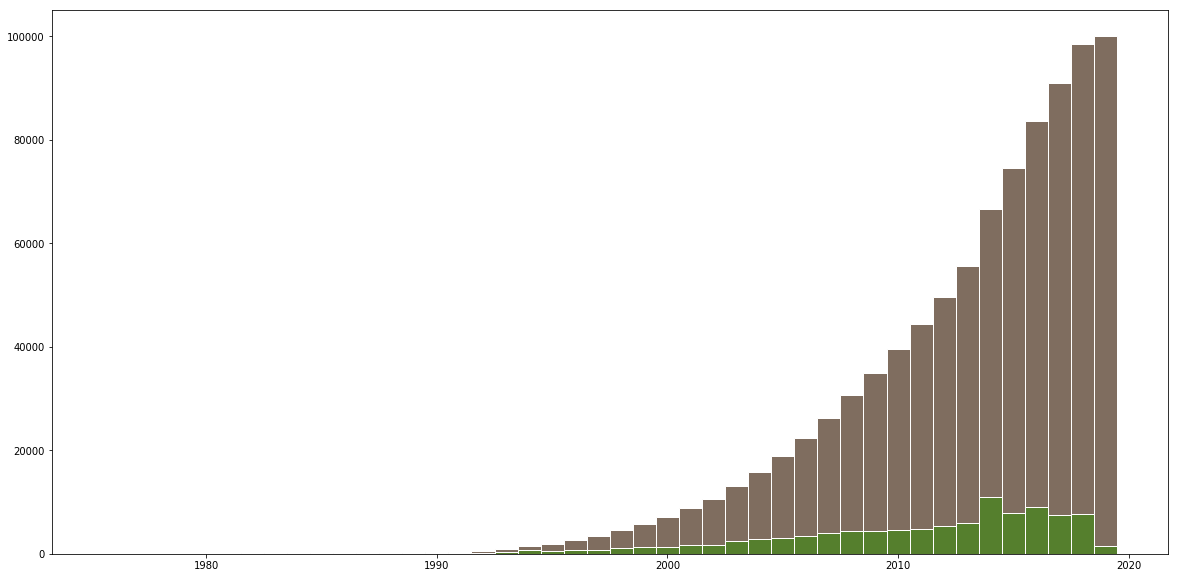

In [74]:
plt.figure(figsize=(20,10))
plt.bar(number_of_years, cumul_list, color='#7f6d5f', edgecolor='white', width=1)
plt.bar(number_of_years, number_of_entry_per_year, color='#557f2d', edgecolor='white', width=1)#number of entries released per year
